# DISSERTAÇÃO DE MESTRADO

@author: Guilherme Nogueira

### Importações

In [2]:
# Gerais
import numpy as np
import pandas as pd
from datetime import date

# Gráficos
import seaborn as sns
import matplotlib.pyplot as plt

# Localização
import locale
locale.setlocale(locale.LC_ALL, 'pt_BR.UTF-8')

'pt_BR.UTF-8'

### PROGRAMA PRINCIPAL

#### Lendo os Dados

In [3]:
# Lendo a Matriz Insumo Produto da EPE/FIPE
mip_epe = pd.read_excel("data\\mips\\48008000133202507_Ian_Anexo.xlsx", skiprows=4)

# Removendo colunas desnecessárias
mip_epe = mip_epe.loc[:, 'Unnamed: 0':'Unnamed: 84']

# Colocando índice para inicar no 1
mip_epe.index = range(1, len(mip_epe) + 1)

mip_epe.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,S01,S02,S03,S04,S05,S06,S07,...,S73,Unnamed: 76,Unnamed: 77,Unnamed: 78,Unnamed: 79,Unnamed: 80,Unnamed: 81,Unnamed: 82,Unnamed: 83,Unnamed: 84
1,Valores correntes em 1 000 000 R$,NaN,NaN,"Agricultura, inclusive o apoio à agricultura e...","Pecuária, inclusive o apoio à pecuária",Produção florestal; pesca e aquicultura,Extração de carvão mineral e de minerais não-m...,"Extração de petróleo e gás, inclusive as ativi...","Extração de minério de ferro, inclusive benefi...","Extração de minerais metálicos não-ferrosos, i...",...,Serviços domésticos,Consumo Intermediário total,Exportação\nde bens e\nserviços,Consumo\ndo governo,Consumo\ndas\n ISFLSF,Consumo \ndas famílias,Formação bruta\nde capital fixo,Variação\nde estoque,Demanda\nfinal,Demanda\ntotal
2,NaN,Número identificador,0.0,1,2,3,4,5,6,7,...,73,74,75,76,77,78,79,80,81,82
3,S01,"Agricultura, inclusive o apoio à agricultura e...",1.0,8170.358564,5290.224615,156.755416,1.826594,9.869268,1.143498,1.784145,...,0,180926.415431,150718.720707,48.304678,0,71191.69866,3188.257846,-8036.397321,217110.584569,398037
4,S02,"Pecuária, inclusive o apoio à pecuária",2.0,1004.959948,6106.811083,183.362642,3.725192,22.939,1.949438,3.244134,...,0,101821.568841,7635.51568,3.187532,0,27053.775014,16625.080156,-1180.127222,50137.431159,151959
5,S03,Produção florestal; pesca e aquicultura,3.0,1414.916247,1437.281917,2063.411671,1.790754,1.823688,0.170106,0.241128,...,0,15970.314929,3068.15858,2.442706,0,17611.770193,1054.002991,163.310602,21899.685071,37870


In [4]:
# Lendo a Matriz Insumo Produto da EPE/FIPE
mip_emp = pd.read_excel("data\\mips\\48008000133202507_Ian_Anexo.xlsx", sheet_name="Emprego")

# Removendo colunas desnecessárias
mip_emp = mip_emp[['empregados']]

mip_emp.head()

,empregados
0,6687599.0
1,5891326.0
2,801096.0
3,118276.0
4,50144.0


#### Guardando informações adicionais

In [5]:
# Guardando um dataframe com os códigos e o que representa
variables = mip_epe.iloc[:, 3:85]

# Mantém como DataFrame de 1 linha
variables = variables.iloc[[0,1]]

# Transpor o dataframe
variables = variables.T

# Transformar o índice em coluna 'id' e só então resetar
variables = variables.reset_index(drop=True)

# Renomeando
variables = variables.rename(columns={1: 'Setor', 2: 'ID'})

# Colocando índice para inicar no 1
# variables.index = range(1, len(variables) + 1)

variables = variables[["ID", "Setor"]]

variables.head(10)

,ID,Setor
0,1,"Agricultura, inclusive o apoio à agricultura e..."
1,2,"Pecuária, inclusive o apoio à pecuária"
2,3,Produção florestal; pesca e aquicultura
3,4,Extração de carvão mineral e de minerais não-m...
4,5,"Extração de petróleo e gás, inclusive as ativi..."
5,6,"Extração de minério de ferro, inclusive benefi..."
6,7,"Extração de minerais metálicos não-ferrosos, i..."
7,8,"Abate e produtos de carne, inclusive os produt..."
8,9,Fabricação e refino de açúcar
9,10,Outros produtos alimentares


#### Limpando a MIP

In [6]:
mip_epe.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,S01,S02,S03,S04,S05,S06,S07,...,S73,Unnamed: 76,Unnamed: 77,Unnamed: 78,Unnamed: 79,Unnamed: 80,Unnamed: 81,Unnamed: 82,Unnamed: 83,Unnamed: 84
1,Valores correntes em 1 000 000 R$,NaN,NaN,"Agricultura, inclusive o apoio à agricultura e...","Pecuária, inclusive o apoio à pecuária",Produção florestal; pesca e aquicultura,Extração de carvão mineral e de minerais não-m...,"Extração de petróleo e gás, inclusive as ativi...","Extração de minério de ferro, inclusive benefi...","Extração de minerais metálicos não-ferrosos, i...",...,Serviços domésticos,Consumo Intermediário total,Exportação\nde bens e\nserviços,Consumo\ndo governo,Consumo\ndas\n ISFLSF,Consumo \ndas famílias,Formação bruta\nde capital fixo,Variação\nde estoque,Demanda\nfinal,Demanda\ntotal
2,NaN,Número identificador,0.0,1,2,3,4,5,6,7,...,73,74,75,76,77,78,79,80,81,82
3,S01,"Agricultura, inclusive o apoio à agricultura e...",1.0,8170.358564,5290.224615,156.755416,1.826594,9.869268,1.143498,1.784145,...,0,180926.415431,150718.720707,48.304678,0,71191.69866,3188.257846,-8036.397321,217110.584569,398037
4,S02,"Pecuária, inclusive o apoio à pecuária",2.0,1004.959948,6106.811083,183.362642,3.725192,22.939,1.949438,3.244134,...,0,101821.568841,7635.51568,3.187532,0,27053.775014,16625.080156,-1180.127222,50137.431159,151959
5,S03,Produção florestal; pesca e aquicultura,3.0,1414.916247,1437.281917,2063.411671,1.790754,1.823688,0.170106,0.241128,...,0,15970.314929,3068.15858,2.442706,0,17611.770193,1054.002991,163.310602,21899.685071,37870


In [7]:
# Transformanda a linha 1 como cabeçalho, para ficar apenas números
mip_epe.columns = mip_epe.iloc[1].astype(str).str.strip()

# Removendo as linhas desncessárias
mip_energia = mip_epe.iloc[2:].reset_index(drop=True)

# Renomeando a coluna do Número Identificador
mip_energia = mip_energia.rename(columns={
    "nan": "ID",
    "Número identificador": "Setor",
    "0.0": "ID Numero",
})

# Removendo as linhas de totais
mip_energia = mip_energia.iloc[:73].reset_index(drop=True)

# Colocando índice para inicar no 1
# mip_energia.index = range(1, len(mip_energia) + 1)

mip_energia.head()

2,ID,Setor,ID Numero,1,2,3,4,5,6,7,...,73,74,75,76,77,78,79,80,81,82
0,S01,"Agricultura, inclusive o apoio à agricultura e...",1.0,8170.358564,5290.224615,156.755416,1.826594,9.869268,1.143498,1.784145,...,0,180926.415431,150718.720707,48.304678,0,71191.69866,3188.257846,-8036.397321,217110.584569,398037
1,S02,"Pecuária, inclusive o apoio à pecuária",2.0,1004.959948,6106.811083,183.362642,3.725192,22.939,1.949438,3.244134,...,0,101821.568841,7635.51568,3.187532,0,27053.775014,16625.080156,-1180.127222,50137.431159,151959
2,S03,Produção florestal; pesca e aquicultura,3.0,1414.916247,1437.281917,2063.411671,1.790754,1.823688,0.170106,0.241128,...,0,15970.314929,3068.15858,2.442706,0,17611.770193,1054.002991,163.310602,21899.685071,37870
3,S04,Extração de carvão mineral e de minerais não-m...,4.0,154.571314,418.656284,13.284636,255.387462,731.238716,0.308747,1.358716,...,0,18508.780939,1808.126347,0.074827,0,199.54565,9.766335,-515.294097,1502.219061,20011
4,S05,"Extração de petróleo e gás, inclusive as ativi...",5.0,21.840529,15.400401,0.888832,2.855772,6630.161209,276.153363,28.805251,...,0,133407.137614,92727.090258,0,0,602.278354,11369.449472,-12167.955698,92530.862386,225938


#### Matriz Z (setores z setores)

In [8]:
# Zι é a demanda intermediária total pelo produto de cada setor (soma das linhas de 𝑍, se 𝑧𝑖𝑗​ for a venda do setor 𝑖 para o setor 𝑗).

# Selecionando apenas setores
Z = mip_energia.loc[:73, '1':'73']
Z = np.array(Z)

print("Matriz Z (Fluxo entre setores):\n")
print("\n".join(" ".join(f"{v:>10.2f}" for v in row) for row in Z[:5, :5]))

Matriz Z (Fluxo entre setores):

   8170.36    5290.22     156.76       1.83       9.87
   1004.96    6106.81     183.36       3.73      22.94
   1414.92    1437.28    2063.41       1.79       1.82
    154.57     418.66      13.28     255.39     731.24
     21.84      15.40       0.89       2.86    6630.16


#### Vetor de Demanda Final (f)

In [9]:
# f é a demanda final (famílias, governo, FBCF, estoques, exportações).

# Vetor de Demanda Final (f)
f = mip_energia["81"].values.reshape(-1, 1)

print("\nVetor de Demanda Final (f):\n")
print("\n".join(f"{v:>10.2f}" for v in f.ravel()[:10]))


Vetor de Demanda Final (f):

 217110.58
  50137.43
  21899.69
   1502.22
  92530.86
  73313.87
   9924.99
 236645.65
  33288.97
 221291.87


#### Vetor de Produção Total (x)

In [10]:
#
# Vetor de Produção Total 
#
#  x = Z1 + f

# Calculando o vetor de produção total (x)
x_intermediario = Z.sum(axis=1).reshape(-1, 1)  # Soma dos fluxos intermediários (por linha) coluna df_z["Total Produto"]

# Calculando o vetor de produção total (x)
x = x_intermediario + f

# Exibindo os resultados
print("Vetor de Produção Total (x):")
print("\n".join(f"{v:>10.2f}" for v in x.ravel()[:10]))

Vetor de Produção Total (x):
 398037.00
 151959.00
  37870.00
  20011.00
 225938.00
  92326.00
  18273.00
 292406.00
  51555.00
 324943.00


#### Matriz de Coeficientes Técnicos (A)

In [11]:
#
# Matriz de Coeficientes Técnicos 
#
# A = Z × x^-1
# 

# inversa diagonal de x
X_inv = np.diag(1 / x.flatten())  

# Calcular matriz de coeficientes técnicos A
A = Z @ X_inv

# Garantir que todos os valores sejam float64
A = A.astype(float)

# Exibindo as primeiras linhas da Matriz A
print("\nMatriz de Coeficientes Técnicos (A):\n")
print("\n".join("".join(f"{v:>10.4f}" for v in row) for row in A[:5, :5]))


Matriz de Coeficientes Técnicos (A):

    0.0205    0.0348    0.0041    0.0001    0.0000
    0.0025    0.0402    0.0048    0.0002    0.0001
    0.0036    0.0095    0.0545    0.0001    0.0000
    0.0004    0.0028    0.0004    0.0128    0.0032
    0.0001    0.0001    0.0000    0.0001    0.0293


In [12]:
# Verificando as dimensões
print(f"Dimensão da Matriz Z: {Z.shape}")
print(f"\nDimensão do Vetor f: {f.shape}")
print(f"\nDimensão do Vetor x: {x.shape}")
print(f"\nDimensão do Vetor A: {A.shape}")

Dimensão da Matriz Z: (73, 73)

Dimensão do Vetor f: (73, 1)

Dimensão do Vetor x: (73, 1)

Dimensão do Vetor A: (73, 73)


#### Matriz Inversa de Leontief (L)

In [13]:
# Criando a Matriz Identidade (I) com o mesmo tamanho de A
I = np.eye(A.shape[0])

# Calculando a Inversa de Leontief (L)
try:
    L = np.linalg.inv(I - A)
except np.linalg.LinAlgError:
    print("A matriz (I - A) é singular e não pode ser invertida.")
    L = None

# Exibindo as primeiras linhas da Matriz L
if L is not None:
    print("\nMatriz Inversa de Leontief (L):")
    print("\n".join("".join(f"{v:>10.4f}" for v in row) for row in L[:5, :5]))


Matriz Inversa de Leontief (L):
    1.0271    0.0679    0.0136    0.0083    0.0051
    0.0032    1.0488    0.0063    0.0009    0.0005
    0.0044    0.0116    1.0580    0.0006    0.0004
    0.0039    0.0052    0.0010    1.0143    0.0045
    0.0225    0.0212    0.0114    0.0314    1.0434


#### Valor Adicionado (VA)

In [28]:
n = Z.shape[0]

# Calcular Valor Adicionado (VA)

# Fórmula teórica:
#     VA_i = x_i - Σ_j z_ij
VA = x - Z.sum(axis=1)

## MULTIPLICADORES

### Multiplicador de Produção

In [19]:
#
# mx ​ = L ⋅ i
#

n = A.shape[0]

i = np.ones((n, 1)) # vetor coluna de 1s

m_x = L @ i                # multiplicador de produção

# Dataframe
df_multi_producao = pd.DataFrame({
    "ID": np.arange(1, n+1),
    "Setor": variables["Setor"][:n].to_numpy(),
    "M_Producao": np.ravel(m_x),
})

In [20]:
res_df_multi_producao = df_multi_producao.sort_values("M_Producao", ascending=False)

print("🔹 Setores com os Maiores Multiplicadores de Produção:")
print(res_df_multi_producao.head(10)[["ID", "Setor", "M_Producao"]].to_string(index=False))


🔹 Setores com os Maiores Multiplicadores de Produção:
 ID                                                                 Setor  M_Producao
 47          Comércio por atacado e a varejo, exceto veículos automotores    6.925231
 19                                                 Derivados de petróleo    5.729786
 48                                                  Transporte terrestre    4.249677
 58          Intermediação financeira, seguros e previdência complementar    4.164269
 60     Atividades jurídicas, contábeis, consultoria e sedes de empresas     3.558770
 23 Fabricação de químicos orgânicos e inorgânicos, resinas e elastômeros    3.548998
  1         Agricultura, inclusive o apoio à agricultura e a pós-colheita    3.502012
  5          Extração de petróleo e gás, inclusive as atividades de apoio    3.458744
 40                              Geração centralizada de energia elétrica    2.968071
 64           Outras atividades administrativas e serviços complementares    2.835588


### Multiplicadores de Emprego

In [21]:
E = np.array(mip_emp["empregados"]).reshape(-1, 1)

e = (E / x).reshape(1, n)           # coeficiente de emprego

m_E = e @ L                         # multiplicador de emprego

# Dataframe
df_multi_emprego = pd.DataFrame({
    "ID": np.arange(1, n+1),
    "Setor": variables["Setor"][:n].to_numpy(),
    "M_Emprego": np.ravel(m_E),
})

In [22]:
res_df_multi_emprego = df_multi_emprego.sort_values("M_Emprego", ascending=False)

print("🔹 Setores com os Maiores Multiplicadores de Emprego:")
print(res_df_multi_emprego.head(10)[["ID", "Setor", "M_Emprego"]].to_string(index=False))

🔹 Setores com os Maiores Multiplicadores de Emprego:
 ID                                                                    Setor  M_Emprego
 73                                                      Serviços domésticos  88.157795
  2                                   Pecuária, inclusive o apoio à pecuária  45.941728
 14                         Confecção de artefatos do vestuário e acessórios  33.519695
 72                     Organizações associativas e outros serviços pessoais  31.885666
 71                        Atividades artísticas, criativas e de espetáculos   31.67878
 53                                                              Alimentação  26.966379
  3                                  Produção florestal; pesca e aquicultura  24.538947
  8 Abate e produtos de carne, inclusive os produtos do laticínio e da pesca  23.615319
 68                                                         Educação privada  22.754868
 52                                                               A

In [23]:
# IDs dos setores energéticos
ids_energia = [19, 20, 22, 40, 41, 43]

# filtra no dataframe já ordenado
res_energia = res_df_multi_emprego[res_df_multi_emprego["ID"].isin(ids_energia)]

print("🔹 Multiplicadores de Emprego - Setores Energéticos:")
print(res_energia[["ID", "Setor", "M_Emprego"]].to_string(index=False))

🔹 Multiplicadores de Emprego - Setores Energéticos:
 ID                                    Setor  M_Emprego
 22            Fabricação de biocombustíveis  14.475491
 19                    Derivados de petróleo   4.634215
 20                                Biodiesel   4.427188
 41  Geração distribuída de energia elétrica   3.964478
 40 Geração centralizada de energia elétrica   3.889223
 43                              Gás Natural   2.808045


### Multiplicadores de Valor Adicionado (PIB)

In [24]:
# Coeficiente de Renda (r_i)
income_coeff = VA / x

# Multiplicador de Renda Total
mult_income = income_coeff @ L

# Organização dos Resultados
df_multi_income = pd.DataFrame({
    "ID": np.arange(1, n+1),
    "Setor": variables["Setor"][0:73],
    "Coef_Renda": np.asarray(income_coeff).reshape(-1)[:n],
    "Mult_Renda_Total": np.asarray(mult_income).reshape(-1)[:n]
})

In [25]:
res_df_multi_income = df_multi_income.sort_values("Mult_Renda_Total", ascending=False)

print("🔹 Setores com os Maiores Multiplicadores de PIB:")
print(res_df_multi_income.head(10)[["ID", "Setor", "Coef_Renda", "Mult_Renda_Total"]].to_string(index=False))

🔹 Setores com os Maiores Multiplicadores de PIB:
 ID                                                                      Setor Coef_Renda Mult_Renda_Total
 21                                                                  Coquerias   0.992442         2.543053
 35                 Fabricação de automóveis, caminhões e ônibus, exceto peças   0.976585         1.823992
  8   Abate e produtos de carne, inclusive os produtos do laticínio e da pesca   0.859912         1.679081
  9                                              Fabricação e refino de açúcar    0.95411         1.673618
 41                                    Geração distribuída de energia elétrica   0.932593         1.641838
 22                                              Fabricação de biocombustíveis   0.938339         1.640279
 25 Fabricação de produtos de limpeza, cosméticos/perfumaria e higiene pessoal   0.972957          1.61033
 20                                                                  Biodiesel    0.97504      

## SETORES DE ENERGIA

- S19:	Derivados de petróleo
- S20:	Biodiesel
- S22:	Fabricação de biocombustíveis
- S40:	Geração centralizada de energia elétrica
- S41:	Geração distribuída de energia elétrica
- S43:	Gás Natural

In [26]:
# -----------------------------------------
#  Cálculo dos efeitos em EMPREGO
# -----------------------------------------

# vetor de emprego no ano-base (1 valor por setor, mesma ordem de x/VA)
emp = mip_emp["empregados"].to_numpy(dtype=float).ravel()  # <-- troque "Emprego" se o nome for outro

# só por segurança:
assert len(emp) == len(x), "Comprimento de Emp e x não bate!"


### CENÁRIO 1

In [64]:
# --- índices 0-based dos setores na matriz ---
i_S19 = 18   # Derivados de petróleo
i_S20 = 19   # Biodiesel
i_S22 = 21   # Etanol / Fabricação de biocombustíveis
i_S40 = 39   # Geração centralizada
i_S41 = 40   # Geração distribuída
i_S43 = 42   # Gás natural

# --- garante tipos e formatos ---
f = np.array(f, dtype=float).ravel()
x = np.array(x, dtype=float).ravel()
VA = np.array(VA, dtype=float).ravel()
L = np.array(L, dtype=float)
A = np.array(A, dtype=float)
Z = np.array(Z, dtype=float)

# --- inicializa Δf ---
delta_f = np.zeros_like(f, dtype=float)


# ============================================================
#   Corte total (-100%) em derivados de petróleo e gás natural
# ============================================================
cut_petroleo = -f[i_S19]
cut_gas = -f[i_S43]     

delta_f[i_S19] += cut_petroleo
delta_f[i_S43] += cut_gas

# soma total cortada
montante_cortado = -(cut_petroleo + cut_gas)

# ============================================================
#  Redistribuição do corte de DERIVADOS DE PETRÓLEO
# ============================================================

peso_petroleo = {
    i_S20: 0.621,                            # Biodiesel
    i_S22: 0.379 * 0.9624,                   # Etanol
    i_S40: 0.379 * 0.0362,                   # Eletricidade centralizada
    i_S41: 0.379 * 0.0014,                   # Eletricidade distribuída
}

# normaliza apenas por segurança numérica
soma_p = sum(peso_petroleo.values())
for k, w in peso_petroleo.items():
    delta_f[k] += -cut_petroleo * (w / soma_p)

# ============================================================
#   Redistribuição do corte de GÁS NATURAL
# ============================================================
peso_gas = {
    i_S22: 0.9624,       # Etanol
    i_S40: 0.0362,       # Eletricidade centralizada
    i_S41: 0.0014,       # Eletricidade distribuída
}
soma_g = sum(peso_gas.values())
for k, w in peso_gas.items():
    delta_f[k] += -cut_gas * (w / soma_g)

# ============================================================
#   Efeitos setoriais e em VA
# ============================================================
delta_x = L @ delta_f
x_novo = x + delta_x
va_coeff = np.divide(VA, x, out=np.zeros_like(VA), where=x!=0)
delta_VA = va_coeff * delta_x

# coeficientes de emprego: empregos por unidade de produção
emp_coeff = np.divide(emp, x, out=np.zeros_like(emp, dtype=float), where=x != 0)

# variação de emprego por setor (efeito total: direto + indireto)
delta_emp = emp_coeff * delta_x

# ============================================================
#  DataFrame com resultados + nomes dos setores
# ============================================================

cen1 = pd.DataFrame({
    "ID": np.arange(len(delta_x)) + 1,
    "delta_f": delta_f.ravel(),
    "delta_x": delta_x.ravel(),
    "delta_VA": delta_VA.ravel(),
    "emp_coeff": emp_coeff,   # empregos por unidade de produção
    "delta_emp": delta_emp    # variação de empregos no cenário
})

# faz merge com a tabela de setores
cen1 = cen1.merge(variables, on="ID", how="left")

In [66]:
# ============================================================
#  Resultados agregados
# ============================================================

print("\nCENÁRIO 1:")

print("\nΔVA total:", delta_VA.sum())
print("Δx total:", delta_x.sum())

print("Soma(Δf) =", delta_f.sum())   # ≈ 0  (substituição pura)
print("Redução total de fósseis (R$):", cut_petroleo + cut_gas)


CENÁRIO 1:

ΔVA total: -2001.1964536506748
Δx total: 6233.340854884838
Soma(Δf) = 1.4551915228366852e-11
Redução total de fósseis (R$): -143660.62181908297


In [45]:
# ============================================================
#  Tabelas resumo
# ============================================================

cen1_sorted = cen1.sort_values("delta_x", ascending=False)
print("🔹 Top 10 maiores ganhos de produção (Cenário 2):")
print(cen1_sorted.head(10)[["ID", "Setor", "delta_x", "delta_VA"]].to_string(index=False))

print("\n🔻 Top 10 maiores perdas de produção (Cenário 2):")
print(cen1_sorted.tail(10)[["ID", "Setor", "delta_x", "delta_VA"]].to_string(index=False))

🔹 Top 10 maiores ganhos de produção (Cenário 2):
ID                                                                    Setor      delta_x     delta_VA
20                                                                Biodiesel 83835.100490  3637.749547
22                                            Fabricação de biocombustíveis 54409.387139 29968.459014
 1            Agricultura, inclusive o apoio à agricultura e a pós-colheita 22740.864715 12404.079098
23    Fabricação de químicos orgânicos e inorgânicos, resinas e elastômeros  3609.450867   479.763587
10                                              Outros produtos alimentares  2947.833478  2007.526212
40                                 Geração centralizada de energia elétrica  2529.828527   920.619799
48                                                     Transporte terrestre  2262.642024   762.709371
24     Fabricação de defensivos, desinfestantes, tintas e químicos diversos  1709.022621   295.835949
58             Intermediação fina

In [72]:
cen1["delta_emp"].sum()

574810.2202505402

In [46]:
cen1_sorted_emp = cen1.sort_values("delta_emp", ascending=False)

print("🔹 Top 10 maiores GANHOS de emprego:")
print(cen1_sorted_emp.head(10)[["ID", "Setor", "delta_emp", "emp_coeff"]].to_string(index=False))

print("\n🔻 Top 10 maiores PERDAS de emprego:")
print(cen1_sorted_emp.tail(10)[["ID", "Setor", "delta_emp", "emp_coeff"]].to_string(index=False))

🔹 Top 10 maiores GANHOS de emprego:
ID                                                          Setor     delta_emp  emp_coeff
 1  Agricultura, inclusive o apoio à agricultura e a pós-colheita 382079.515549  16.801451
22                                  Fabricação de biocombustíveis  97845.678448   1.798323
48                                           Transporte terrestre  23128.488793  10.221895
20                                                      Biodiesel  21127.601591   0.252014
 2                         Pecuária, inclusive o apoio à pecuária  20606.911610  38.769181
10                                    Outros produtos alimentares  11658.540203   3.954952
47   Comércio por atacado e a varejo, exceto veículos automotores  11653.199168  14.540389
64    Outras atividades administrativas e serviços complementares   8923.811290  15.966609
39  Manutenção, reparação e instalação de máquinas e equipamentos   3446.509024   6.660177
51 Armazenamento, atividades auxiliares dos transporte

### CENÁRIO 2

In [67]:
# --- índices 0-based dos setores ---
i_S19 = 18   # Derivados de petróleo
i_S20 = 19   # Biodiesel
i_S22 = 21   # Etanol / Fabricação de biocombustíveis
i_S40 = 39   # Geração centralizada
i_S41 = 40   # Geração distribuída
i_S43 = 42   # Gás natural

# --- garante tipos e formatos ---
f = np.array(f, dtype=float).ravel()
x = np.array(x, dtype=float).ravel()
VA = np.array(VA, dtype=float).ravel()
L = np.array(L, dtype=float)
A = np.array(A, dtype=float)
Z = np.array(Z, dtype=float)

# --- inicializa Δf ---
delta_f = np.zeros_like(f, dtype=float)

# ============================================================
#  Corte total (-100%) em derivados de petróleo, gás natural e etanol
# ============================================================
cut_petroleo = -(0.379*f[i_S19])
cut_gas = -f[i_S43]
cut_etanol = -f[i_S22]

delta_f[i_S19] += cut_petroleo
delta_f[i_S43] += cut_gas
delta_f[i_S22] += cut_etanol

# soma total cortada
montante_cortado = -(cut_petroleo + cut_gas + cut_etanol)

# ============================================================
#  Redistribuição: 95% geração centralizada / 5% distribuída
# ============================================================
delta_f[i_S40] += montante_cortado * 0.95
delta_f[i_S41] += montante_cortado * 0.05

# ============================================================
#  Efeitos setoriais
# ============================================================
delta_x = L @ delta_f
x_novo = x + delta_x
va_coeff = np.divide(VA, x, out=np.zeros_like(VA), where=x!=0)
delta_VA = va_coeff * delta_x

# -----------------------------------------
#  Efeitos em EMPREGO (CENÁRIO 1)
# -----------------------------------------

# coeficientes de emprego: empregos por unidade de produção
emp_coeff = np.divide(emp, x, out=np.zeros_like(emp, dtype=float), where=x != 0)

# variação de emprego por setor (efeito total: direto + indireto)
delta_emp = emp_coeff * delta_x

# ============================================================
#  DataFrame com resultados + nomes dos setores
# ============================================================
cen2 = pd.DataFrame({
    "ID": np.arange(len(delta_x)) + 1,  # ajusta +1 para casar com o dataframe variables
    "delta_f": delta_f,
    "delta_x": delta_x,
    "delta_VA": delta_VA,
    "emp_coeff": emp_coeff,   # empregos por unidade de produção
    "delta_emp": delta_emp    # variação de empregos no cenário
}).merge(variables, on="ID", how="left")

In [68]:
# ============================================================
#  Resultados agregados
# ============================================================

print("\nCENÁRIO 2:")

print("\nΔVA total:", delta_VA.sum())
print("Δx total:", delta_x.sum())

print("Soma(Δf) =", delta_f.sum())  # deve ≈ 0
print("Total cortado (R$):", montante_cortado)



CENÁRIO 2:

ΔVA total: -17225.943863074484
Δx total: -20523.445278125175
Soma(Δf) = 0.0
Total cortado (R$): 90824.61572183298


In [59]:
# ============================================================
#  Tabelas resumo
# ============================================================

cen2_sorted = cen2.sort_values("delta_x", ascending=False)
print("🔹 Top 10 maiores ganhos de produção (Cenário 2):")
print(cen2_sorted.head(10)[["ID", "Setor", "delta_x", "delta_VA"]].to_string(index=False))

print("\n🔻 Top 10 maiores perdas de produção (Cenário 2):")
print(cen2_sorted.tail(10)[["ID", "Setor", "delta_x", "delta_VA"]].to_string(index=False))

🔹 Top 10 maiores ganhos de produção (Cenário 2):
ID                                                           Setor       delta_x     delta_VA
40                        Geração centralizada de energia elétrica 113314.937690 41235.986581
42                                                     Transmissão   8138.807790    25.826894
41                         Geração distribuída de energia elétrica   7410.911833  1644.896400
33                 Fabricação de máquinas e equipamentos elétricos   2486.534493  1238.759276
62         Outras atividades profissionais, científicas e técnicas   1347.463013    65.545287
58    Intermediação financeira, seguros e previdência complementar   1336.253783   621.249576
64     Outras atividades administrativas e serviços complementares   1027.383838   231.506083
31 Fabricação de produtos de metal, exceto máquinas e equipamentos   1021.987859   250.784469
57     Desenvolvimento de sistemas e outros serviços de informação    780.075666   391.587833
28         

In [60]:
cen2_sorted_emp = cen2.sort_values("delta_emp", ascending=False)

print("🔹 Top 10 maiores GANHOS de emprego:")
print(cen2_sorted_emp.head(10)[["ID", "Setor", "delta_emp", "emp_coeff"]].to_string(index=False))

print("\n🔻 Top 10 maiores PERDAS de emprego:")
print(cen2_sorted_emp.tail(10)[["ID", "Setor", "delta_emp", "emp_coeff"]].to_string(index=False))

🔹 Top 10 maiores GANHOS de emprego:
ID                                                                 Setor    delta_emp  emp_coeff
40                              Geração centralizada de energia elétrica 50118.605066   0.442295
64           Outras atividades administrativas e serviços complementares 16403.835742  15.966609
62               Outras atividades profissionais, científicas e técnicas  7880.241885   5.848206
31       Fabricação de produtos de metal, exceto máquinas e equipamentos  6710.903919   6.566520
61 Serviços de arquitetura, engenharia, testes/análises técnicas e P & D  6477.950520  10.026109
33                       Fabricação de máquinas e equipamentos elétricos  6168.732992   2.480856
42                                                           Transmissão  6056.600386   0.744163
28                      Fabricação de produtos de minerais não-metálicos  4609.020094   6.717829
72                  Organizações associativas e outros serviços pessoais  4196.059842  26.1

### CENÁRIO 3

In [69]:
# --------- índices 0-based dos setores (ajuste se necessário) ---------
i_S19 = 18   # Derivados de petróleo
i_S20 = 19   # Biodiesel
i_S22 = 21   # Etanol / Fabricação de biocombustíveis
i_S40 = 39   # Geração centralizada (mantém)
i_S41 = 40   # Geração distribuída (mantém)
i_S43 = 42   # Gás natural

# --------- garantir tipos e formas corretos ---------
f  = np.array(f,  dtype=float).ravel()
x  = np.array(x,  dtype=float).ravel()
VA = np.array(VA, dtype=float).ravel()
A  = np.array(A,  dtype=float)
L  = np.array(L,  dtype=float)
Z  = np.array(Z,  dtype=float)

# coeficiente de VA por unidade de produção
va_coeff = np.divide(VA, x, out=np.zeros_like(VA), where=x!=0)

# --------- CENÁRIO 3: construir delta_f ---------
delta_f = np.zeros_like(f, dtype=float)

# 1) Cortes totais (-100%) em derivados de petróleo e gás natural
cut_petroleo = -f[i_S19]  # valor negativo
cut_gas      = -f[i_S43]  # valor negativo
delta_f[i_S19] += cut_petroleo
delta_f[i_S43] += cut_gas

# 2) Eletricidade (S40, S41) "mantém" => não altera f (nenhum ajuste aqui)

# 3) Realocação do corte de DERIVADOS DE PETRÓLEO
#    - Biodiesel: 0,623 ; Etanol: 0,377  (somam 1)
w_biodiesel_petroleo = 0.621
w_etanol_petroleo    = 0.379
montante_petroleo = -(cut_petroleo)  # valor positivo do corte
delta_f[i_S20] += montante_petroleo * w_biodiesel_petroleo
delta_f[i_S22] += montante_petroleo * w_etanol_petroleo

# 4) Realocação do corte de GÁS NATURAL
#    - Biodiesel: 50% ; Etanol: 50%
w_biodiesel_gas = 0.50
w_etanol_gas    = 0.50
montante_gas = -(cut_gas)  # valor positivo do corte
delta_f[i_S20] += montante_gas * w_biodiesel_gas
delta_f[i_S22] += montante_gas * w_etanol_gas

# --------- Efeitos setoriais ---------
delta_x = (L @ delta_f).ravel()
x_novo  = x + delta_x
delta_VA = va_coeff * delta_x

# -----------------------------------------
#  Efeitos em EMPREGO (CENÁRIO 1)
# -----------------------------------------

# coeficientes de emprego: empregos por unidade de produção
emp_coeff = np.divide(emp, x, out=np.zeros_like(emp, dtype=float), where=x != 0)

# variação de emprego por setor (efeito total: direto + indireto)
delta_emp = emp_coeff * delta_x

# --------- Resultados com nomes dos setores ---------
cen3 = pd.DataFrame({
    "ID": np.arange(len(delta_x)) + 1,  # +1 para casar com 'variables' (1..73)
    "delta_f": delta_f,
    "delta_x": delta_x,
    "delta_VA": delta_VA,
    "emp_coeff": emp_coeff,   # empregos por unidade de produção
    "delta_emp": delta_emp    # variação de empregos no cenário
}).merge(variables, on="ID", how="left")

In [70]:
# ============================================================
#  Resultados agregados
# ============================================================

print("\nCENÁRIO 3:")

print("\nΔVA total:", delta_VA.sum())
print("Δx total:", delta_x.sum())

print("Soma(Δf) =", float(delta_f.sum()))  # deve ser ≈ 0
print("Corte total redistribuído (R$):", float(montante_petroleo + montante_gas))



CENÁRIO 3:

ΔVA total: -4034.281080590874
Δx total: 6793.113876602103
Soma(Δf) = 0.0
Corte total redistribuído (R$): 143660.62181908297


In [62]:
# ============================================================
#  Tabelas resumo
# ============================================================

cen3_sorted = cen3.sort_values("delta_x", ascending=False)
print("🔹 Top 10 maiores ganhos de produção (Cenário 3):")
print(cen3_sorted.head(10)[["ID", "Setor", "delta_x", "delta_VA"]].to_string(index=False))

print("\n🔻 Top 10 maiores perdas de produção (Cenário 3):")
print(cen3_sorted.tail(10)[["ID", "Setor", "delta_x", "delta_VA"]].to_string(index=False))

🔹 Top 10 maiores ganhos de produção (Cenário 3):
ID                                                                    Setor      delta_x     delta_VA
20                                                                Biodiesel 88849.796489  3855.345852
22                                            Fabricação de biocombustíveis 51712.334679 28482.933991
 1            Agricultura, inclusive o apoio à agricultura e a pós-colheita 21577.838452 11769.702616
23    Fabricação de químicos orgânicos e inorgânicos, resinas e elastômeros  3474.849021   461.872482
10                                              Outros produtos alimentares  2786.549718  1897.689147
48                                                     Transporte terrestre  2175.582374   733.362612
24     Fabricação de defensivos, desinfestantes, tintas e químicos diversos  1626.714899   281.588284
58             Intermediação financeira, seguros e previdência complementar  1223.164029   568.672017
47             Comércio por ataca

In [63]:
res_sorted_emp = res.sort_values("delta_emp", ascending=False)

print("🔹 Top 10 maiores GANHOS de emprego:")
print(res_sorted_emp.head(10)[["ID", "Setor", "delta_emp", "emp_coeff"]].to_string(index=False))

print("\n🔻 Top 10 maiores PERDAS de emprego:")
print(res_sorted_emp.tail(10)[["ID", "Setor", "delta_emp", "emp_coeff"]].to_string(index=False))

🔹 Top 10 maiores GANHOS de emprego:
ID                                                          Setor     delta_emp  emp_coeff
 1  Agricultura, inclusive o apoio à agricultura e a pós-colheita 362538.987210  16.801451
22                                  Fabricação de biocombustíveis  92995.505681   1.798323
20                                                      Biodiesel  22391.374147   0.252014
48                                           Transporte terrestre  22238.574206  10.221895
 2                         Pecuária, inclusive o apoio à pecuária  19569.666854  38.769181
47   Comércio por atacado e a varejo, exceto veículos automotores  13695.204603  14.540389
10                                    Outros produtos alimentares  11020.670657   3.954952
64    Outras atividades administrativas e serviços complementares   7984.945811  15.966609
51 Armazenamento, atividades auxiliares dos transportes e correio   3360.397960   5.822909
39  Manutenção, reparação e instalação de máquinas e e

### Figura 9

In [79]:
print("\nTotal de Empregos criados:")

print(f"\nCenário 1: {cen1['delta_emp'].sum()}")
print(f"Cenário 2: {cen2['delta_emp'].sum()}")
print(f"Cenário 3: {cen3['delta_emp'].sum()}")


Total de Empregos criados:

Cenário 1: 574810.2202505402
Cenário 2: -345005.9765352178
Cenário 3: 548141.873343704


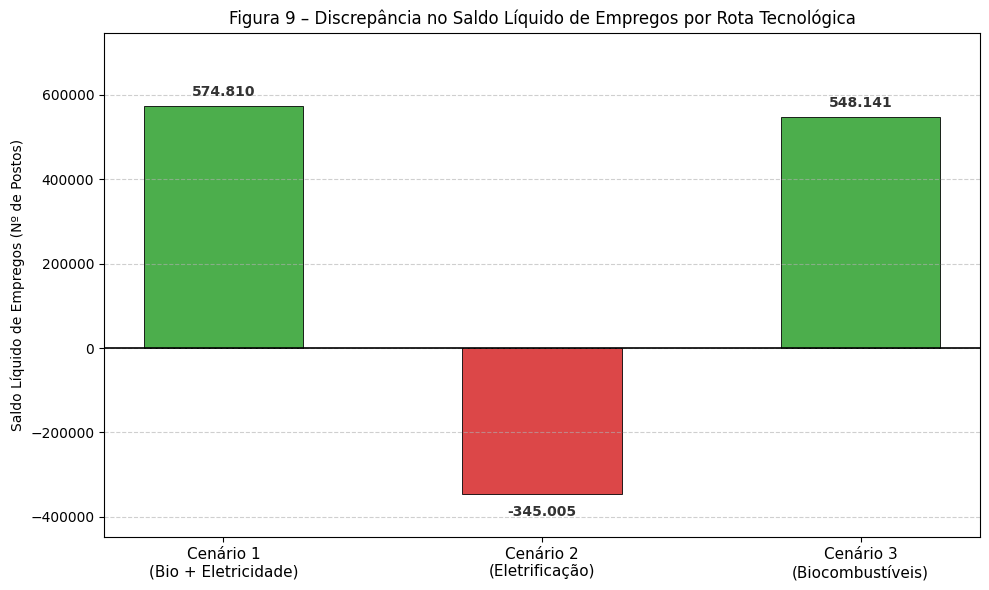

In [78]:
# ==============================================================================
#  FIGURA 9: SALDO LÍQUIDO DE EMPREGOS (Gerada Automaticamente)
# ==============================================================================
import matplotlib.pyplot as plt

# Dados extraídos diretamente dos seus resultados
cenarios_labels = ['Cenário 1\n(Bio + Eletricidade)', 'Cenário 2\n(Eletrificação)', 'Cenário 3\n(Biocombustíveis)']
saldos_emprego = [cen1['delta_emp'].sum(), cen2['delta_emp'].sum(), cen3['delta_emp'].sum()]

# Configuração do Gráfico
fig, ax = plt.subplots(figsize=(10, 6))
x_pos = np.arange(len(cenarios_labels))
width = 0.5

# Cores condicionais (Verde para saldo positivo, Vermelho para negativo)
colors = ['#2ca02c' if val >= 0 else '#d62728' for val in saldos_emprego]

rects = ax.bar(x_pos, saldos_emprego, width, color=colors, alpha=0.85, edgecolor='black', linewidth=0.7)

# Estilização
ax.set_ylabel('Saldo Líquido de Empregos (Nº de Postos)')
ax.set_title('Figura 9 – Discrepância no Saldo Líquido de Empregos por Rota Tecnológica')
ax.set_xticks(x_pos)
ax.set_xticklabels(cenarios_labels, fontsize=11)
ax.axhline(0, color='black', linewidth=1.2)
ax.grid(axis='y', linestyle='--', alpha=0.6)

# Função para adicionar rótulos de valor nas barras
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        offset = 5 if height >= 0 else -18
        ax.annotate(f'{int(height):,}'.replace(',', '.'),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, offset),
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=10, fontweight='bold', color='#333333')

autolabel(rects)

# Ajuste da escala Y para melhor visualização
plt.ylim(min(saldos_emprego)*1.3, max(saldos_emprego)*1.3)

plt.tight_layout()
plt.show() # Ou plt.savefig('figura_9_saldo_empregos.png', dpi=300)